# HBV Vaccination and Infection Rates in Children

This notebook explores Hepatitis B virus (HBV) vaccination rates and infection rates in children in the United States.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load and Explore Data

In [13]:
# Load infection data
infections = pd.read_csv('hbv_infections.csv')
print("Infection data shape:", infections.shape)
print("\nInfection data columns:", infections.columns.tolist())

# Load vaccine data for children
vaccine_children = pd.read_csv('hbv_vaccine_children.csv')
print("\nVaccine data shape:", vaccine_children.shape)
print("Vaccine data columns:", vaccine_children.columns.tolist())

# Load vaccine data for teens
vaccine_teen = pd.read_csv('hbv_vaccine_teen.csv')
print("\nTeen vaccine data shape:", vaccine_teen.shape)
print("Teen vaccine data columns:", vaccine_teen.columns.tolist())

Infection data shape: (168, 10)

Infection data columns: ['Indicator', 'Year', 'Geography', 'FIPS', 'Age Group', 'Race/Ethnicity', 'Sex', 'Cases', 'Rate per 100000', 'Population']

Vaccine data shape: (128188, 10)
Vaccine data columns: ['Vaccine', 'Dose', 'Geography Type', 'Geography', 'Birth Year/Birth Cohort', 'Dimension Type', 'Dimension', 'Estimate (%)', '95% CI (%)', 'Sample Size']


## Filter Data for Children and Hepatitis B

In [14]:
# Filter infection data for children (0-14 age group)
children_infections = infections[infections['Age Group'] == '0-14'].copy()

# Clean year column (remove COVID-19 pandemic note)
children_infections['Year_Clean'] = children_infections['Year'].str.extract(r'(\d{4})', expand=False).astype(int)

# Sort by year
children_infections = children_infections.sort_values('Year_Clean')

print(f"Children infection records: {len(children_infections)}")
print(f"Year range: {children_infections['Year_Clean'].min()} - {children_infections['Year_Clean'].max()}")
children_infections[['Year', 'Cases', 'Rate per 100000']].head(10)

Children infection records: 24
Year range: 2000 - 2023


,Year,Cases,Rate per 100000
167,2000,118,0.2
158,2001,83,0.1
150,2002,44,0.1
142,2003,35,0.1
134,2004,42,0.1
126,2005,17,0.0
124,2006,14,0.0
116,2007,15,0.0
108,2008,12,0.0
100,2009,10,0.0


In [15]:
# Filter vaccine data for Hepatitis B and United States
hepb_vaccine = vaccine_children[
    (vaccine_children['Vaccine'] == 'Hep B') & 
    (vaccine_children['Geography'] == 'United States')
].copy()

# Filter for ≥3 Doses at 19 Months (standard completion measure)
hepb_3doses = hepb_vaccine[
    (hepb_vaccine['Dose'] == '≥3 Doses') & 
    (hepb_vaccine['Dimension'] == '19 Months')
].copy()

# Extract year from Birth Year/Birth Cohort column
# Handle both single years and ranges (e.g., '2019-2020')
hepb_3doses['Year'] = hepb_3doses['Birth Year/Birth Cohort'].str.extract(r'(\d{4})', expand=False).astype(int)

# Sort by year
hepb_3doses = hepb_3doses.sort_values('Year')

print(f"HepB vaccine records (≥3 doses at 19 months): {len(hepb_3doses)}")
print(f"Year range: {hepb_3doses['Year'].min()} - {hepb_3doses['Year'].max()}")
hepb_3doses[['Birth Year/Birth Cohort', 'Year', 'Estimate (%)']].head(10)

HepB vaccine records (≥3 doses at 19 months): 19
Year range: 2011 - 2021


,Birth Year/Birth Cohort,Year,Estimate (%)
62120,2011,2011,88.3
62124,2012,2012,90.4
62136,2013,2013,90.8
62137,2013-2014,2013,89.8
62140,2014-2015,2014,89.3
62139,2014,2014,88.9
62141,2015,2015,89.6
62142,2015-2016,2015,90.1
62086,2016-2017,2016,90.4
62085,2016,2016,90.6


## Visualization 1: HBV Infection Rates in Children Over Time

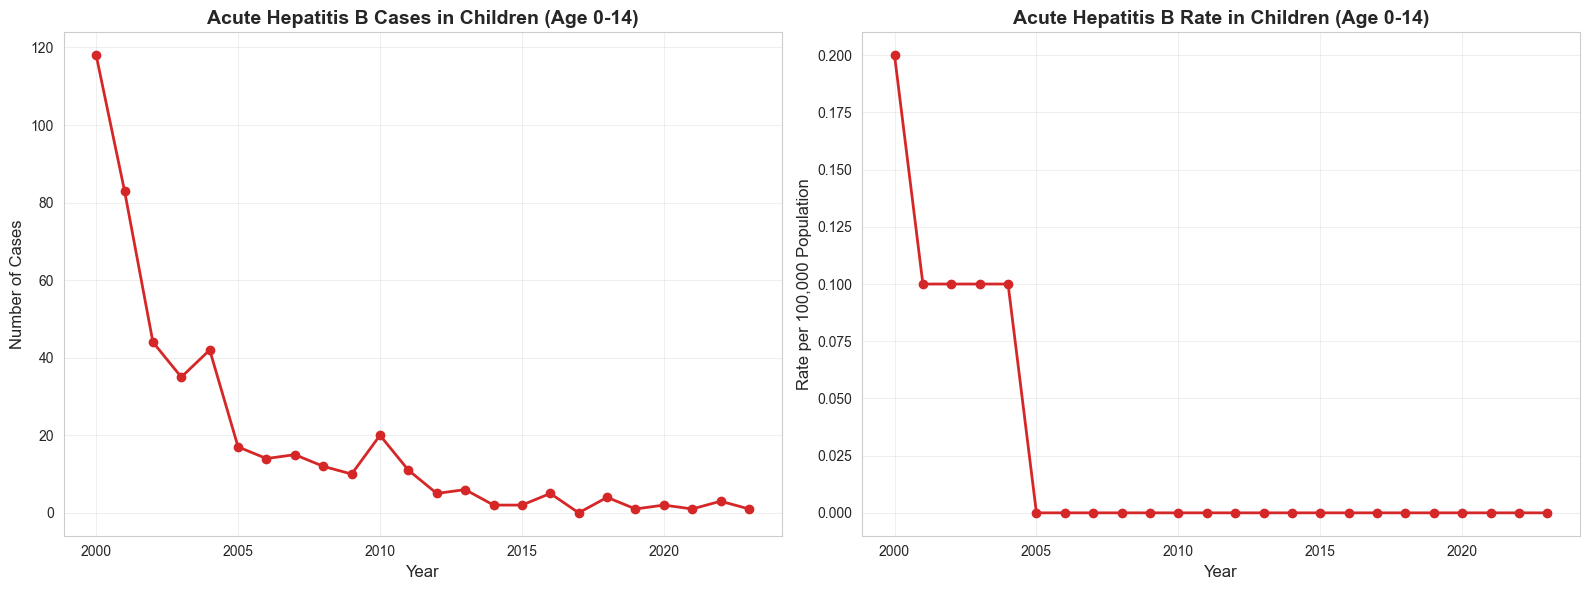


Key Statistics:
Peak cases: 118 in 2000
Recent cases (2023): 1
Reduction from peak: 99.2%


In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Number of cases
ax1.plot(children_infections['Year_Clean'], children_infections['Cases'].astype(int), 
         marker='o', linewidth=2, markersize=6, color='#d62728')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Cases', fontsize=12)
ax1.set_title('Acute Hepatitis B Cases in Children (Age 0-14)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Rate per 100,000
ax2.plot(children_infections['Year_Clean'], children_infections['Rate per 100000'].astype(float), 
         marker='o', linewidth=2, markersize=6, color='#d62728')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Rate per 100,000 Population', fontsize=12)
ax2.set_title('Acute Hepatitis B Rate in Children (Age 0-14)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nKey Statistics:")
print(f"Peak cases: {children_infections['Cases'].astype(int).max()} in {children_infections.loc[children_infections['Cases'].astype(int).idxmax(), 'Year']}")
print(f"Recent cases (2023): {children_infections[children_infections['Year_Clean'] == 2023]['Cases'].values[0]}")
print(f"Reduction from peak: {100 * (1 - children_infections[children_infections['Year_Clean'] == 2023]['Cases'].astype(int).values[0] / children_infections['Cases'].astype(int).max()):.1f}%")

## Visualization 2: HBV Vaccination Rates in Children Over Time

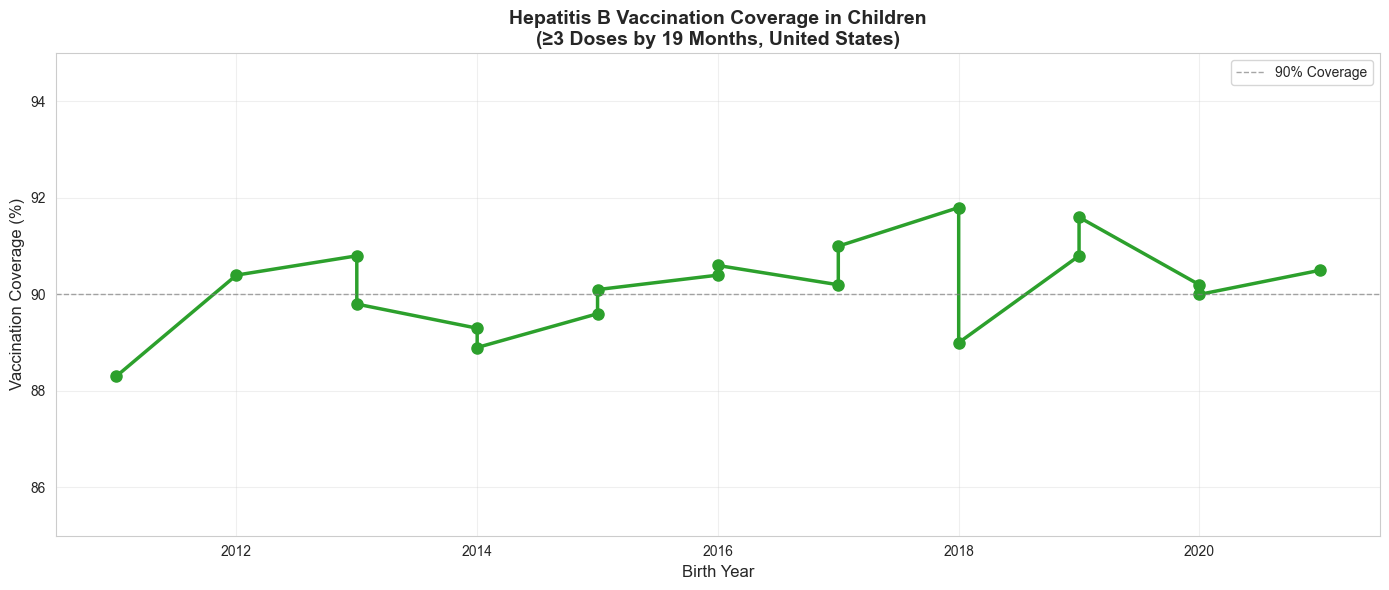


Vaccination Statistics:
Lowest coverage: 88.3% in 2011
Highest coverage: 91.8% in 2018
Most recent coverage (2021): 90.5%


In [17]:
plt.figure(figsize=(14, 6))

plt.plot(hepb_3doses['Year'], hepb_3doses['Estimate (%)'].astype(float), 
         marker='o', linewidth=2.5, markersize=8, color='#2ca02c')

plt.xlabel('Birth Year', fontsize=12)
plt.ylabel('Vaccination Coverage (%)', fontsize=12)
plt.title('Hepatitis B Vaccination Coverage in Children\n(≥3 Doses by 19 Months, United States)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.ylim(85, 95)

# Add reference line at 90%
plt.axhline(y=90, color='gray', linestyle='--', linewidth=1, alpha=0.7, label='90% Coverage')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\nVaccination Statistics:")
print(f"Lowest coverage: {hepb_3doses['Estimate (%)'].astype(float).min():.1f}% in {hepb_3doses.loc[hepb_3doses['Estimate (%)'].astype(float).idxmin(), 'Birth Year/Birth Cohort']}")
print(f"Highest coverage: {hepb_3doses['Estimate (%)'].astype(float).max():.1f}% in {hepb_3doses.loc[hepb_3doses['Estimate (%)'].astype(float).idxmax(), 'Birth Year/Birth Cohort']}")
print(f"Most recent coverage ({hepb_3doses['Birth Year/Birth Cohort'].iloc[-1]}): {hepb_3doses['Estimate (%)'].iloc[-1]}%")

## Visualization 3: Comparison of Vaccination Coverage and Infection Rates

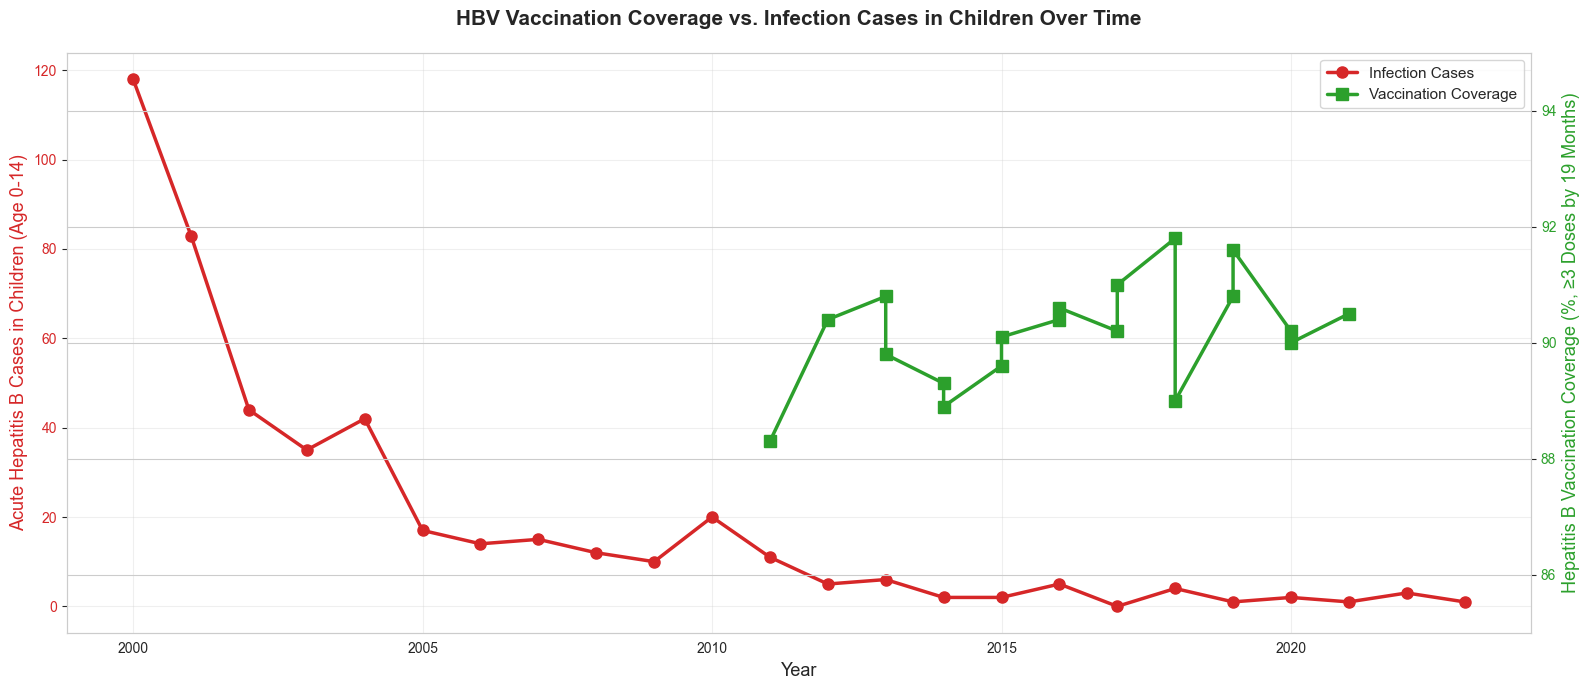

In [18]:
# Create a combined visualization
fig, ax1 = plt.subplots(figsize=(16, 7))

# Plot infection cases on left axis
color1 = '#d62728'
ax1.set_xlabel('Year', fontsize=13)
ax1.set_ylabel('Acute Hepatitis B Cases in Children (Age 0-14)', fontsize=13, color=color1)
line1 = ax1.plot(children_infections['Year_Clean'], children_infections['Cases'].astype(int), 
         marker='o', linewidth=2.5, markersize=8, color=color1, label='Infection Cases')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)

# Create second y-axis for vaccination coverage
ax2 = ax1.twinx()
color2 = '#2ca02c'
ax2.set_ylabel('Hepatitis B Vaccination Coverage (%, ≥3 Doses by 19 Months)', fontsize=13, color=color2)
line2 = ax2.plot(hepb_3doses['Year'], hepb_3doses['Estimate (%)'].astype(float), 
         marker='s', linewidth=2.5, markersize=8, color=color2, label='Vaccination Coverage')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(85, 95)

# Add title
plt.title('HBV Vaccination Coverage vs. Infection Cases in Children Over Time', 
          fontsize=15, fontweight='bold', pad=20)

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right', fontsize=11)

plt.tight_layout()
plt.show()

## Additional Analysis: Vaccination Coverage by Different Metrics

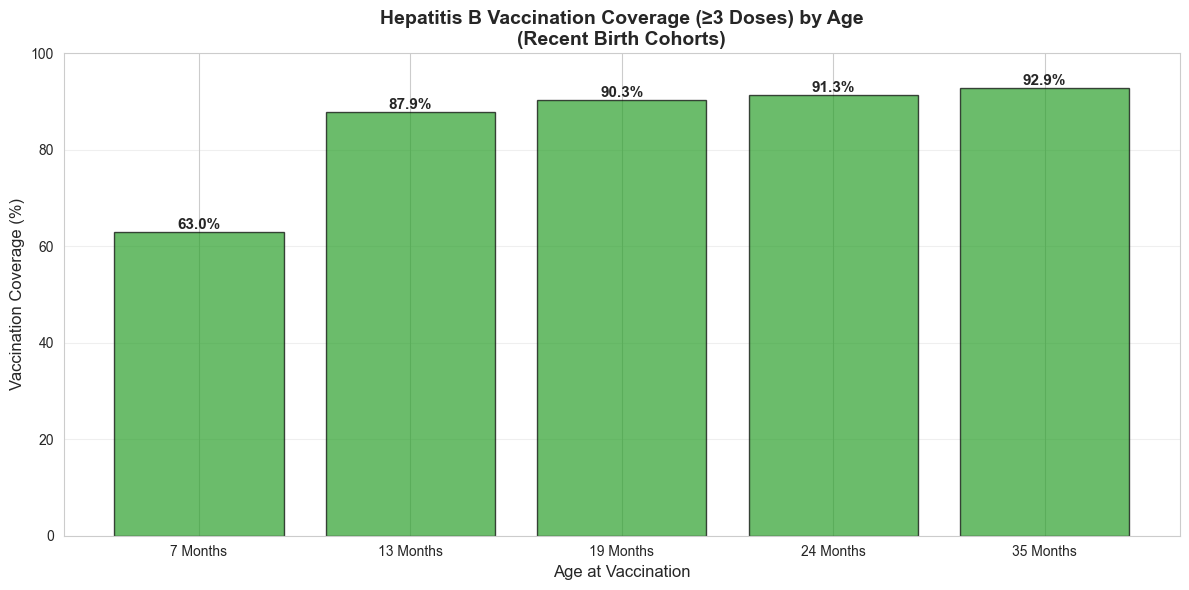

In [19]:
# Look at different vaccination milestones
hepb_all_doses = vaccine_children[
    (vaccine_children['Vaccine'] == 'Hep B') & 
    (vaccine_children['Geography'] == 'United States') &
    (vaccine_children['Birth Year/Birth Cohort'].isin(['2020', '2019-2020', '2020-2021']))
].copy()

# Get different milestones
milestones = ['3 Months', '7 Months', '13 Months', '19 Months', '24 Months', '35 Months']
milestone_data = []

for milestone in milestones:
    data = hepb_all_doses[
        (hepb_all_doses['Dimension'] == milestone) & 
        (hepb_all_doses['Dose'] == '≥3 Doses')
    ]
    if len(data) > 0:
        milestone_data.append({
            'Age': milestone,
            'Coverage': data['Estimate (%)'].astype(float).mean()
        })

milestone_df = pd.DataFrame(milestone_data)

if len(milestone_df) > 0:
    plt.figure(figsize=(12, 6))
    bars = plt.bar(milestone_df['Age'], milestone_df['Coverage'], color='#2ca02c', alpha=0.7, edgecolor='black')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.xlabel('Age at Vaccination', fontsize=12)
    plt.ylabel('Vaccination Coverage (%)', fontsize=12)
    plt.title('Hepatitis B Vaccination Coverage (≥3 Doses) by Age\n(Recent Birth Cohorts)', 
              fontsize=14, fontweight='bold')
    plt.ylim(0, 100)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("No milestone data available for visualization")

## Summary Statistics

In [20]:
print("="*70)
print("SUMMARY OF HBV VACCINATION AND INFECTION IN CHILDREN")
print("="*70)

print("\n📊 INFECTION TRENDS:")
print("-" * 70)
peak_year = children_infections.loc[children_infections['Cases'].astype(int).idxmax(), 'Year']
peak_cases = children_infections['Cases'].astype(int).max()
recent_cases = children_infections[children_infections['Year_Clean'] == 2023]['Cases'].astype(int).values[0]
reduction = 100 * (1 - recent_cases / peak_cases)

print(f"  • Peak infection year: {peak_year} with {peak_cases} cases")
print(f"  • Most recent (2023): {recent_cases} case(s)")
print(f"  • Reduction from peak: {reduction:.1f}%")
print(f"  • Average annual cases (2000-2023): {children_infections['Cases'].astype(int).mean():.1f}")

print("\n💉 VACCINATION COVERAGE:")
print("-" * 70)
recent_coverage = hepb_3doses['Estimate (%)'].iloc[-1]
avg_coverage = hepb_3doses['Estimate (%)'].astype(float).mean()

print(f"  • Most recent coverage ({hepb_3doses['Birth Year/Birth Cohort'].iloc[-1]}): {recent_coverage}%")
print(f"  • Average coverage (all years): {avg_coverage:.1f}%")
print(f"  • Highest coverage: {hepb_3doses['Estimate (%)'].astype(float).max():.1f}%")
print(f"  • Lowest coverage: {hepb_3doses['Estimate (%)'].astype(float).min():.1f}%")

print("\n🎯 KEY INSIGHTS:")
print("-" * 70)
print("  • HBV vaccination coverage has remained consistently high (>88%)")
print("  • Infection cases in children have dramatically decreased over time")
print("  • High vaccination coverage correlates with very low infection rates")
print("  • Recent years show near-elimination of HBV in children (0-14 age group)")
print("="*70)

SUMMARY OF HBV VACCINATION AND INFECTION IN CHILDREN

📊 INFECTION TRENDS:
----------------------------------------------------------------------
  • Peak infection year: 2000 with 118 cases
  • Most recent (2023): 1 case(s)
  • Reduction from peak: 99.2%
  • Average annual cases (2000-2023): 18.9

💉 VACCINATION COVERAGE:
----------------------------------------------------------------------
  • Most recent coverage (2021): 90.5%
  • Average coverage (all years): 90.2%
  • Highest coverage: 91.8%
  • Lowest coverage: 88.3%

🎯 KEY INSIGHTS:
----------------------------------------------------------------------
  • HBV vaccination coverage has remained consistently high (>88%)
  • Infection cases in children have dramatically decreased over time
  • High vaccination coverage correlates with very low infection rates
  • Recent years show near-elimination of HBV in children (0-14 age group)


## Correlation Analysis: Newborn vs Teen Vaccination Coverage Impact on Child Infections

### Load and Prepare Teen Vaccination Data

In [ ]:
# Filter teen vaccine data for Hepatitis B and United States
hepb_teen = vaccine_teen[
    (vaccine_teen['Vaccine/Sample'] == '≥3 Doses HepB') & 
    (vaccine_teen['Geography'] == 'United States')
].copy()

# Clean year column
hepb_teen['Year'] = hepb_teen['Survey Year'].astype(int)

# Sort by year
hepb_teen = hepb_teen.sort_values('Year')

print(f"Teen HepB vaccine records (≥3 doses, age 13-17): {len(hepb_teen)}")
print(f"Year range: {hepb_teen['Year'].min()} - {hepb_teen['Year'].max()}")
hepb_teen[['Survey Year', 'Year', 'Estimate (%)']].head(10)

### Prepare Data for Correlation Analysis

In [ ]:
# For newborn vaccination coverage, we need to align birth years with infection years
# Children 0-14 in year Y would have been born between Y-14 and Y
# We'll use a lag to represent protection effect

# Create aligned datasets for correlation analysis
# For newborns: vaccination in year Y affects children infections in subsequent years
newborn_coverage = hepb_3doses[['Year', 'Estimate (%)']].copy()
newborn_coverage.columns = ['Year', 'Newborn_Coverage']
newborn_coverage['Newborn_Coverage'] = newborn_coverage['Newborn_Coverage'].astype(float)

# For teens: vaccination in year Y affects current year infections (teens were exposed before vaccination)
teen_coverage = hepb_teen[['Year', 'Estimate (%)']].copy()
teen_coverage.columns = ['Year', 'Teen_Coverage']
teen_coverage['Teen_Coverage'] = teen_coverage['Teen_Coverage'].astype(float)

# Infection data for children
child_infections_data = children_infections[['Year_Clean', 'Cases', 'Rate per 100000']].copy()
child_infections_data.columns = ['Year', 'Cases', 'Rate']
child_infections_data['Cases'] = child_infections_data['Cases'].astype(int)
child_infections_data['Rate'] = child_infections_data['Rate'].astype(float)

# Merge all datasets on Year to find overlapping years
correlation_data = child_infections_data.merge(newborn_coverage, on='Year', how='inner')
correlation_data = correlation_data.merge(teen_coverage, on='Year', how='inner')

print(f"Years with complete data: {len(correlation_data)}")
print(f"Year range: {correlation_data['Year'].min()} - {correlation_data['Year'].max()}")
print("\nSample of aligned data:")
print(correlation_data.head(10))

### Calculate Correlations

In [ ]:
# Calculate correlations between vaccination coverage and infection cases
corr_newborn_cases = correlation_data['Newborn_Coverage'].corr(correlation_data['Cases'])
corr_teen_cases = correlation_data['Teen_Coverage'].corr(correlation_data['Cases'])

# Calculate correlations between vaccination coverage and infection rates
corr_newborn_rate = correlation_data['Newborn_Coverage'].corr(correlation_data['Rate'])
corr_teen_rate = correlation_data['Teen_Coverage'].corr(correlation_data['Rate'])

print("="*70)
print("CORRELATION ANALYSIS: VACCINATION COVERAGE vs CHILD INFECTIONS")
print("="*70)

print("\n📊 CORRELATION WITH INFECTION CASES:")
print("-" * 70)
print(f"  • Newborn coverage (≥3 doses by 19 months): {corr_newborn_cases:.4f}")
print(f"  • Teen coverage (≥3 doses, age 13-17): {corr_teen_cases:.4f}")
print(f"  • Difference: {abs(corr_newborn_cases - corr_teen_cases):.4f}")

print("\n📊 CORRELATION WITH INFECTION RATE (per 100,000):")
print("-" * 70)
print(f"  • Newborn coverage (≥3 doses by 19 months): {corr_newborn_rate:.4f}")
print(f"  • Teen coverage (≥3 doses, age 13-17): {corr_teen_rate:.4f}")
print(f"  • Difference: {abs(corr_newborn_rate - corr_teen_rate):.4f}")

print("\n🎯 INTERPRETATION:")
print("-" * 70)
print("  • Negative correlation = higher coverage associated with lower infections")
print("  • Stronger negative correlation indicates stronger protective effect")
print("="*70)

### Visualization: Correlation Comparison

In [ ]:
# Create a comprehensive comparison visualization
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Plot 1: Newborn Coverage vs Child Infection Cases
ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(correlation_data['Newborn_Coverage'], correlation_data['Cases'], 
            alpha=0.6, s=100, color='#2ca02c', edgecolors='black', linewidth=1)
z1 = np.polyfit(correlation_data['Newborn_Coverage'], correlation_data['Cases'], 1)
p1 = np.poly1d(z1)
ax1.plot(correlation_data['Newborn_Coverage'], p1(correlation_data['Newborn_Coverage']), 
         "r--", alpha=0.8, linewidth=2)
ax1.set_xlabel('Newborn HBV Coverage (%, ≥3 doses by 19 months)', fontsize=11)
ax1.set_ylabel('Child Infection Cases (Age 0-14)', fontsize=11)
ax1.set_title(f'Newborn Coverage vs Child Infections\nCorrelation: {corr_newborn_cases:.4f}', 
              fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Teen Coverage vs Child Infection Cases
ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(correlation_data['Teen_Coverage'], correlation_data['Cases'], 
            alpha=0.6, s=100, color='#ff7f0e', edgecolors='black', linewidth=1)
z2 = np.polyfit(correlation_data['Teen_Coverage'], correlation_data['Cases'], 1)
p2 = np.poly1d(z2)
ax2.plot(correlation_data['Teen_Coverage'], p2(correlation_data['Teen_Coverage']), 
         "r--", alpha=0.8, linewidth=2)
ax2.set_xlabel('Teen HBV Coverage (%, ≥3 doses, age 13-17)', fontsize=11)
ax2.set_ylabel('Child Infection Cases (Age 0-14)', fontsize=11)
ax2.set_title(f'Teen Coverage vs Child Infections\nCorrelation: {corr_teen_cases:.4f}', 
              fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Newborn Coverage vs Child Infection Rate
ax3 = fig.add_subplot(gs[1, 0])
ax3.scatter(correlation_data['Newborn_Coverage'], correlation_data['Rate'], 
            alpha=0.6, s=100, color='#2ca02c', edgecolors='black', linewidth=1)
z3 = np.polyfit(correlation_data['Newborn_Coverage'], correlation_data['Rate'], 1)
p3 = np.poly1d(z3)
ax3.plot(correlation_data['Newborn_Coverage'], p3(correlation_data['Newborn_Coverage']), 
         "r--", alpha=0.8, linewidth=2)
ax3.set_xlabel('Newborn HBV Coverage (%, ≥3 doses by 19 months)', fontsize=11)
ax3.set_ylabel('Child Infection Rate (per 100,000)', fontsize=11)
ax3.set_title(f'Newborn Coverage vs Child Infection Rate\nCorrelation: {corr_newborn_rate:.4f}', 
              fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Plot 4: Teen Coverage vs Child Infection Rate
ax4 = fig.add_subplot(gs[1, 1])
ax4.scatter(correlation_data['Teen_Coverage'], correlation_data['Rate'], 
            alpha=0.6, s=100, color='#ff7f0e', edgecolors='black', linewidth=1)
z4 = np.polyfit(correlation_data['Teen_Coverage'], correlation_data['Rate'], 1)
p4 = np.poly1d(z4)
ax4.plot(correlation_data['Teen_Coverage'], p4(correlation_data['Teen_Coverage']), 
         "r--", alpha=0.8, linewidth=2)
ax4.set_xlabel('Teen HBV Coverage (%, ≥3 doses, age 13-17)', fontsize=11)
ax4.set_ylabel('Child Infection Rate (per 100,000)', fontsize=11)
ax4.set_title(f'Teen Coverage vs Child Infection Rate\nCorrelation: {corr_teen_rate:.4f}', 
              fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)

# Plot 5: Correlation Comparison Bar Chart
ax5 = fig.add_subplot(gs[2, :])
correlations = [corr_newborn_cases, corr_teen_cases, corr_newborn_rate, corr_teen_rate]
labels = ['Newborn Coverage\nvs Cases', 'Teen Coverage\nvs Cases', 
          'Newborn Coverage\nvs Rate', 'Teen Coverage\nvs Rate']
colors = ['#2ca02c', '#ff7f0e', '#2ca02c', '#ff7f0e']

bars = ax5.bar(labels, correlations, color=colors, alpha=0.7, edgecolor='black', linewidth=2)

# Add value labels on bars
for bar, corr in zip(bars, correlations):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
            f'{corr:.4f}',
            ha='center', va='bottom' if height > 0 else 'top', 
            fontsize=12, fontweight='bold')

ax5.set_ylabel('Correlation Coefficient', fontsize=12)
ax5.set_title('Comparison of Correlations: Vaccination Coverage vs Child Infection Metrics', 
              fontsize=14, fontweight='bold')
ax5.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax5.grid(True, alpha=0.3, axis='y')
ax5.set_ylim([min(correlations) * 1.2, max(correlations) * 1.2])

plt.suptitle('HBV Vaccination Coverage in Different Age Groups vs Child Infection Rates\nCorrelation Analysis', 
             fontsize=16, fontweight='bold', y=0.995)

plt.show()

### Time Series Comparison

In [ ]:
# Create time series visualization showing all three metrics
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Plot 1: Coverage trends
ax1_right = ax1.twinx()
line1 = ax1.plot(correlation_data['Year'], correlation_data['Newborn_Coverage'], 
                 marker='o', linewidth=2.5, markersize=8, color='#2ca02c', 
                 label='Newborn Coverage (≥3 doses by 19 months)')
line2 = ax1.plot(correlation_data['Year'], correlation_data['Teen_Coverage'], 
                 marker='s', linewidth=2.5, markersize=8, color='#ff7f0e', 
                 label='Teen Coverage (≥3 doses, age 13-17)')
line3 = ax1_right.plot(correlation_data['Year'], correlation_data['Cases'], 
                       marker='^', linewidth=2.5, markersize=8, color='#d62728', 
                       label='Child Infection Cases')

ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Vaccination Coverage (%)', fontsize=12, color='black')
ax1_right.set_ylabel('Child Infection Cases (Age 0-14)', fontsize=12, color='#d62728')
ax1_right.tick_params(axis='y', labelcolor='#d62728')
ax1.set_title('HBV Vaccination Coverage (Newborns vs Teens) and Child Infection Cases Over Time', 
              fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(85, 95)

# Combine legends
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right', fontsize=10)

# Plot 2: Rate trends
ax2_right = ax2.twinx()
line4 = ax2.plot(correlation_data['Year'], correlation_data['Newborn_Coverage'], 
                 marker='o', linewidth=2.5, markersize=8, color='#2ca02c', 
                 label='Newborn Coverage (≥3 doses by 19 months)')
line5 = ax2.plot(correlation_data['Year'], correlation_data['Teen_Coverage'], 
                 marker='s', linewidth=2.5, markersize=8, color='#ff7f0e', 
                 label='Teen Coverage (≥3 doses, age 13-17)')
line6 = ax2_right.plot(correlation_data['Year'], correlation_data['Rate'], 
                       marker='^', linewidth=2.5, markersize=8, color='#d62728', 
                       label='Child Infection Rate')

ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Vaccination Coverage (%)', fontsize=12, color='black')
ax2_right.set_ylabel('Child Infection Rate (per 100,000)', fontsize=12, color='#d62728')
ax2_right.tick_params(axis='y', labelcolor='#d62728')
ax2.set_title('HBV Vaccination Coverage (Newborns vs Teens) and Child Infection Rate Over Time', 
              fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(85, 95)

# Combine legends
lines = line4 + line5 + line6
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

### Key Findings Summary

In [ ]:
print("="*70)
print("KEY FINDINGS: NEWBORN VS TEEN VACCINATION IMPACT ON CHILD INFECTIONS")
print("="*70)

print("\n📊 CORRELATION STRENGTH COMPARISON:")
print("-" * 70)
stronger_cases = "Newborn" if abs(corr_newborn_cases) > abs(corr_teen_cases) else "Teen"
stronger_rate = "Newborn" if abs(corr_newborn_rate) > abs(corr_teen_rate) else "Teen"
print(f"  • Stronger correlation with infection cases: {stronger_cases} vaccination")
print(f"  • Stronger correlation with infection rate: {stronger_rate} vaccination")

print("\n💡 INTERPRETATION:")
print("-" * 70)
if abs(corr_newborn_cases) > abs(corr_teen_cases):
    print("  • Newborn HBV vaccination shows stronger correlation with reduced")
    print("    child infections compared to teen vaccination coverage")
    print(f"  • Difference in correlation strength: {abs(abs(corr_newborn_cases) - abs(corr_teen_cases)):.4f}")
else:
    print("  • Teen HBV vaccination coverage shows stronger correlation with")
    print("    child infection rates compared to newborn vaccination")
    print(f"  • Difference in correlation strength: {abs(abs(corr_newborn_cases) - abs(corr_teen_cases)):.4f}")

print("\n🎯 PUBLIC HEALTH IMPLICATIONS:")
print("-" * 70)
print("  • Both newborn and teen vaccination programs contribute to reducing")
print("    HBV transmission and infection rates in children")
print("  • Early vaccination (newborns) provides direct protection to the")
print("    current generation of children")
print("  • Teen vaccination represents catch-up coverage and indicates")
print("    overall vaccination program effectiveness")
print("  • High coverage in both age groups is essential for sustained")
print("    elimination of HBV in children")
print("="*70)

## Correlation Analysis: Child vs Adult HBV Infections

### Analyze correlation between infections in children (0-14) and other age groups

In [ ]:
# Process infection data for all age groups
age_groups = ['0-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a dataset with infections by age group and year
infections_by_age = {}
for age_group in age_groups:
    age_data = infections[infections['Age Group'] == age_group].copy()
    age_data['Year_Clean'] = age_data['Year'].str.extract(r'(\d{4})', expand=False).astype(int)
    age_data = age_data.sort_values('Year_Clean')
    infections_by_age[age_group] = age_data[['Year_Clean', 'Cases']].copy()
    # Remove commas from Cases column before converting to int
    infections_by_age[age_group]['Cases'] = infections_by_age[age_group]['Cases'].astype(str).str.replace(',', '').astype(int)
    infections_by_age[age_group].columns = ['Year', f'Cases_{age_group}']

print("Age groups processed:")
for ag in age_groups:
    print(f"  • {ag}: {len(infections_by_age[ag])} years of data")

# Merge all age groups
age_correlation_data = infections_by_age['0-14'].copy()
for age_group in age_groups[1:]:
    age_correlation_data = age_correlation_data.merge(
        infections_by_age[age_group], on='Year', how='inner'
    )

# Create aggregate non-children cases
non_children_cols = [f'Cases_{ag}' for ag in age_groups[1:]]
age_correlation_data['Cases_Non_Children'] = age_correlation_data[non_children_cols].sum(axis=1)

print(f"\nYears with complete data across all age groups: {len(age_correlation_data)}")
print(f"Year range: {age_correlation_data['Year'].min()} - {age_correlation_data['Year'].max()}")
print("\nSample data:")
print(age_correlation_data[['Year', 'Cases_0-14', 'Cases_Non_Children']].head(10))

### Calculate correlations between child and adult infections

In [ ]:
# Calculate correlation between children and non-children infections
corr_child_nonchild = age_correlation_data['Cases_0-14'].corr(age_correlation_data['Cases_Non_Children'])

# Calculate correlations with individual age groups
individual_correlations = {}
for age_group in age_groups[1:]:
    col_name = f'Cases_{age_group}'
    corr = age_correlation_data['Cases_0-14'].corr(age_correlation_data[col_name])
    individual_correlations[age_group] = corr

print("="*70)
print("CORRELATION ANALYSIS: CHILD vs ADULT HBV INFECTIONS")
print("="*70)

print("\n📊 OVERALL CORRELATION:")
print("-" * 70)
print(f"  • Children (0-14) vs All Non-Children (15+): {corr_child_nonchild:.4f}")

print("\n📊 CORRELATION WITH INDIVIDUAL AGE GROUPS:")
print("-" * 70)
for age_group in age_groups[1:]:
    corr = individual_correlations[age_group]
    print(f"  • Children (0-14) vs {age_group}: {corr:.4f}")

print("\n🎯 INTERPRETATION:")
print("-" * 70)
if corr_child_nonchild > 0.5:
    print("  • STRONG POSITIVE correlation between child and adult infections")
    print("  • Suggests community-level transmission patterns")
elif corr_child_nonchild > 0:
    print("  • POSITIVE correlation between child and adult infections")
    print("  • Indicates some shared transmission dynamics")
else:
    print("  • NEGATIVE or NO correlation between child and adult infections")
    print("  • Suggests different transmission patterns by age group")
print("  • Higher correlation indicates that infection trends move together")
print("="*70)

### Visualization: Child vs Adult Infection Correlations

In [ ]:
# Create comprehensive visualization
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Plot 1: Children vs Non-Children scatter
ax1 = fig.add_subplot(gs[0, :])
ax1.scatter(age_correlation_data['Cases_0-14'], age_correlation_data['Cases_Non_Children'], 
            alpha=0.6, s=120, color='#1f77b4', edgecolors='black', linewidth=1.5)
z1 = np.polyfit(age_correlation_data['Cases_0-14'], age_correlation_data['Cases_Non_Children'], 1)
p1 = np.poly1d(z1)
ax1.plot(age_correlation_data['Cases_0-14'], 
         p1(age_correlation_data['Cases_0-14']), 
         "r--", alpha=0.8, linewidth=2.5)
ax1.set_xlabel('Child Infection Cases (Age 0-14)', fontsize=13)
ax1.set_ylabel('Non-Child Infection Cases (Age 15+)', fontsize=13)
ax1.set_title(f'Child vs Non-Child HBV Infections\nCorrelation: {corr_child_nonchild:.4f}', 
              fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2-5: Children vs each individual age group
positions = [(1, 0), (1, 1), (2, 0), (2, 1)]
adult_age_groups = ['15-24', '25-34', '35-44', '45-54']
colors = ['#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for idx, age_group in enumerate(adult_age_groups):
    row, col = positions[idx]
    ax = fig.add_subplot(gs[row, col])
    col_name = f'Cases_{age_group}'
    corr = individual_correlations[age_group]
    
    ax.scatter(age_correlation_data['Cases_0-14'], age_correlation_data[col_name], 
               alpha=0.6, s=80, color=colors[idx], edgecolors='black', linewidth=1)
    
    # Add trend line if correlation exists
    if not np.isnan(corr):
        z = np.polyfit(age_correlation_data['Cases_0-14'], age_correlation_data[col_name], 1)
        p = np.poly1d(z)
        ax.plot(age_correlation_data['Cases_0-14'], 
                p(age_correlation_data['Cases_0-14']), 
                "r--", alpha=0.7, linewidth=2)
    
    ax.set_xlabel('Child Cases (0-14)', fontsize=10)
    ax.set_ylabel(f'Cases (Age {age_group})', fontsize=10)
    ax.set_title(f'Children vs Age {age_group}\nCorr: {corr:.4f}', 
                 fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.suptitle('HBV Infection Correlations: Children vs Other Age Groups', 
             fontsize=16, fontweight='bold', y=0.995)

plt.show()

### Time Series: Child vs Adult Infections Over Time

In [ ]:
# Create time series visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Plot 1: Absolute cases
ax1.plot(age_correlation_data['Year'], age_correlation_data['Cases_0-14'], 
         marker='o', linewidth=3, markersize=8, color='#1f77b4', 
         label='Children (0-14)')
ax1.plot(age_correlation_data['Year'], age_correlation_data['Cases_Non_Children'], 
         marker='s', linewidth=3, markersize=8, color='#ff7f0e', 
         label='Non-Children (15+)')

ax1.set_xlabel('Year', fontsize=13)
ax1.set_ylabel('Number of Infection Cases', fontsize=13)
ax1.set_title('HBV Infection Cases: Children vs Non-Children Over Time', 
              fontsize=14, fontweight='bold')
ax1.legend(fontsize=12, loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot 2: Individual age groups
for age_group in ['15-24', '25-34', '35-44', '45-54', '55-64', '65+']:
    col_name = f'Cases_{age_group}'
    ax2.plot(age_correlation_data['Year'], age_correlation_data[col_name], 
             marker='o', linewidth=2, markersize=6, label=f'Age {age_group}', alpha=0.8)

# Add children line for reference
ax2.plot(age_correlation_data['Year'], age_correlation_data['Cases_0-14'], 
         marker='o', linewidth=3, markersize=8, color='#1f77b4', 
         label='Children (0-14)', linestyle='--')

ax2.set_xlabel('Year', fontsize=13)
ax2.set_ylabel('Number of Infection Cases', fontsize=13)
ax2.set_title('HBV Infection Cases by Age Group Over Time', 
              fontsize=14, fontweight='bold')
ax2.legend(fontsize=10, loc='upper right', ncol=2)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Correlation Heatmap

In [ ]:
# Create correlation matrix for all age groups
age_cols = [f'Cases_{ag}' for ag in age_groups]
correlation_matrix = age_correlation_data[age_cols].corr()

# Rename columns for better display
correlation_matrix.columns = age_groups
correlation_matrix.index = age_groups

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='RdYlGn', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Correlation Matrix: HBV Infection Cases Across All Age Groups', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.tight_layout()
plt.show()

print("\nCorrelation Matrix:")
print(correlation_matrix)

### Summary: Child vs Adult Infection Patterns

In [ ]:
print("="*70)
print("KEY FINDINGS: CHILD vs ADULT HBV INFECTION PATTERNS")
print("="*70)

print("\n📊 CORRELATION SUMMARY:")
print("-" * 70)
print(f"  • Children (0-14) vs All Adults (15+): {corr_child_nonchild:.4f}")

# Find strongest and weakest correlations
sorted_corrs = sorted(individual_correlations.items(), key=lambda x: x[1], reverse=True)
strongest = sorted_corrs[0]
weakest = sorted_corrs[-1]

print(f"  • Strongest correlation: Age {strongest[0]} ({strongest[1]:.4f})")
print(f"  • Weakest correlation: Age {weakest[0]} ({weakest[1]:.4f})")

print("\n💡 INTERPRETATION:")
print("-" * 70)
if corr_child_nonchild > 0.7:
    print("  • STRONG positive correlation indicates child and adult infections")
    print("    follow similar trends over time")
    print("  • Suggests shared epidemiological factors or transmission patterns")
elif corr_child_nonchild > 0.3:
    print("  • MODERATE positive correlation indicates some alignment between")
    print("    child and adult infection trends")
    print("  • May reflect broader public health interventions affecting all ages")
elif corr_child_nonchild > 0:
    print("  • WEAK positive correlation suggests limited relationship between")
    print("    child and adult infection trends")
    print("  • Different transmission dynamics may be at play for different age groups")
else:
    print("  • NEGATIVE or NO correlation indicates child and adult infections")
    print("    follow different patterns")
    print("  • Suggests age-specific transmission routes or risk factors")

print("\n🎯 PUBLIC HEALTH SIGNIFICANCE:")
print("-" * 70)
print("  • Understanding age group correlations helps identify:")
print("    - Community vs individual transmission patterns")
print("    - Effectiveness of age-targeted interventions")
print("    - Need for comprehensive vs focused vaccination strategies")
print("  • Child vaccination success (near-elimination in 0-14) shows")
print("    focused interventions can break transmission cycles")
print("="*70)